<a href="https://colab.research.google.com/github/WilliamShengYangHuang/AA_Knowledge_Graph_Research/blob/main/GNN_test_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysing Palladian Language**

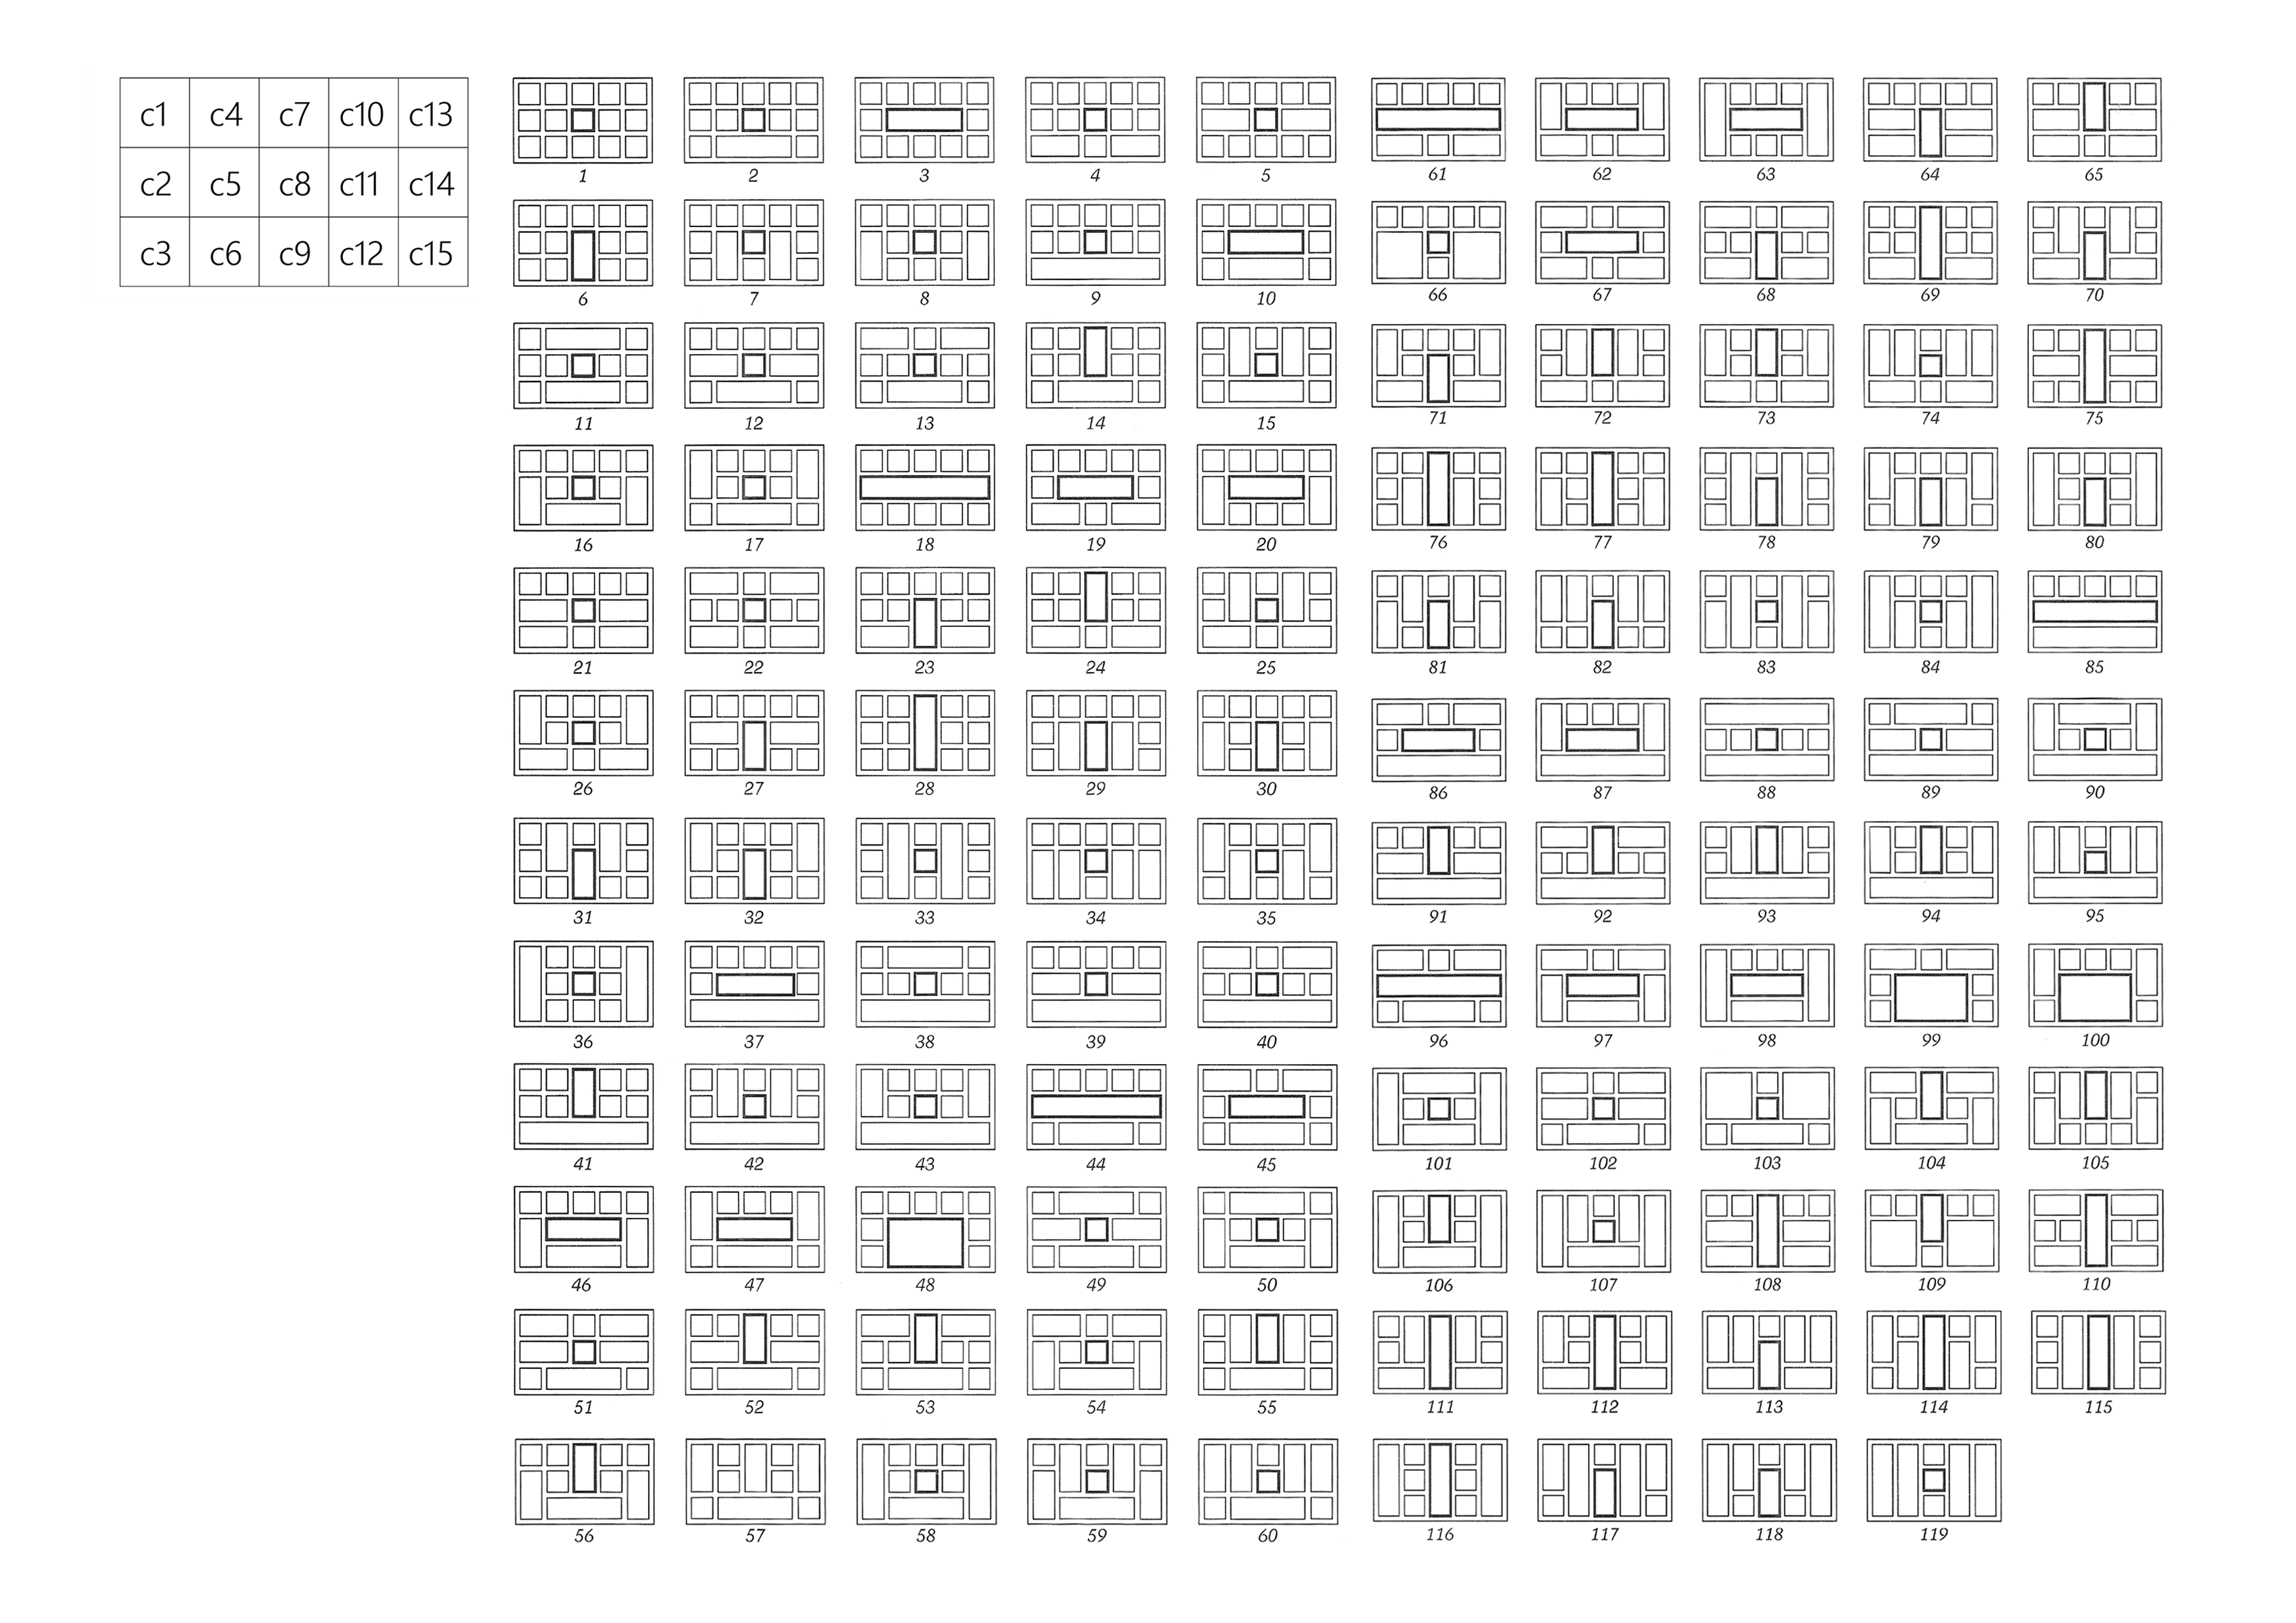

## Pre-processing

### Import Necessary Packages

In [1]:
import os
import pandas as pd
pd.__version__ # Displays Pandas version
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

### Load and Read Data

In [2]:
# Place the dataset in your Google Drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# Set csv file path
PATH = "/content/drive/My Drive/Palladian_Language.csv"

# Read csv from Drive
df = pd.read_csv(PATH)
df

c1_u   c1_d   c1_l   c1_r   c2_u   c2_d   c2_l   c2_r   c3_u   c3_d  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False   True  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
114  False  False  False  False  False  False  False  False   True  False   
115  False   True  False  False   True   True  False  False   True  False   
116  False   True  False  False   True  False  False  False  False  False   
117  False   True  False  False   True   True  False  False   True  False   
118  False   True  False  False   True   True  False  False   True  False   

     ...  c13_l  c13_r  c14_u  c14_d  c14_l  c14_r  c15_u  c15_d  c15_l  c15_r  
0    ...  False  False  False  False  False  False  False  False  False  False  
1    ...  False  False  False  False  False  False  False  False  False  False  
2    ...  False  False  False  False  False  False  False  False  False  False  
3    ...  False  False  False  False  False  False  False  False   True  False  
4    ...  False  False  False  False   True  False  False  False  False  False  
..   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
114  ...  False  False  False  False  False  False  False  False  False  False  
115  ...  False  False   True   True  False  False   True  False  False  False  
116  ...  False  False   True  False  False  False  False  False  False  False  
117  ...  False  False   True   True  False  False   True  False  False  False  
118  ...  False  False   True   True  False  False   True  False  False  False  

[119 rows x 60 columns]

In [4]:
all_columns = ['c1_u', 'c1_d',	'c1_l',	'c1_r',
               'c2_u',	'c2_d',	'c2_l',	'c2_r',
               'c3_u',	'c3_d',	'c3_l',	'c3_r',
               'c4_u',	'c4_d',	'c4_l',	'c4_r',
               'c5_u',	'c5_d',	'c5_l',	'c5_r',
               'c6_u',	'c6_d',	'c6_l',	'c6_r',
               'c7_u',	'c7_d',	'c7_l',	'c7_r',
               'c8_u',	'c8_d',	'c8_l',	'c8_r',
               'c9_u',	'c9_d',	'c9_l',	'c9_r',
               'c10_u', 'c10_d',	'c10_l',	'c10_r',
               'c11_u',	'c11_d',	'c11_l',	'c11_r',
               'c12_u',	'c12_d',	'c12_l',	'c12_r',
               'c13_u',	'c13_d',	'c13_l',	'c13_r',
               'c14_u',	'c14_d',	'c14_l',	'c14_r',
               'c15_u',	'c15_d',	'c15_l',	'c15_r']

In [5]:
array = np.array(df).reshape(1, -1)
array

array([[False, False, False, ..., False, False, False]])

In [6]:
array = np.array(df).reshape(1, -1)
list = array.flatten().astype(int)
numeric_array = np.array_split(list, 119)

DF = pd.DataFrame(numeric_array, dtype=int) #==================
DF

0   1   2   3   4   5   6   7   8   9   ...  50  51  52  53  54  55  56  \
0     0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1     0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
2     0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
3     0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
4     0   0   0   0   0   0   0   1   0   0  ...   0   0   0   0   1   0   0   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
114   0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
115   0   1   0   0   1   1   0   0   1   0  ...   0   0   1   1   0   0   1   
116   0   1   0   0   1   0   0   0   0   0  ...   0   0   1   0   0   0   0   
117   0   1   0   0   1   1   0   0   1   0  ...   0   0   1   1   0   0   1   
118   0   1   0   0   1   1   0   0   1   0  ...   0   0   1   1   0   0   1   

     57  58  59  
0     0   0   0  
1     0   0   0  
2     0   0   0  
3     0   1   0  
4     0   0   0  
..   ..  ..  ..  
114   0   0   0  
115   0   0   0  
116   0   0   0  
117   0   0   0  
118   0   0   0  

[119 rows x 60 columns]

In [7]:
DF_str = pd.DataFrame(numeric_array, dtype=str) #==================
DF_str

0  1  2  3  4  5  6  7  8  9   ... 50 51 52 53 54 55 56 57 58 59
0    0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0
1    0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0
2    0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0
3    0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  1  0
4    0  0  0  0  0  0  0  1  0  0  ...  0  0  0  0  1  0  0  0  0  0
..  .. .. .. .. .. .. .. .. .. ..  ... .. .. .. .. .. .. .. .. .. ..
114  0  0  0  0  0  0  0  0  1  0  ...  0  0  0  0  0  0  0  0  0  0
115  0  1  0  0  1  1  0  0  1  0  ...  0  0  1  1  0  0  1  0  0  0
116  0  1  0  0  1  0  0  0  0  0  ...  0  0  1  0  0  0  0  0  0  0
117  0  1  0  0  1  1  0  0  1  0  ...  0  0  1  1  0  0  1  0  0  0
118  0  1  0  0  1  1  0  0  1  0  ...  0  0  1  1  0  0  1  0  0  0

[119 rows x 60 columns]

### Heatmap

In [8]:
DF.describe()

0           1      2           3           4           5      6   \
count  119.0  119.000000  119.0  119.000000  119.000000  119.000000  119.0   
mean     0.0    0.302521    0.0    0.159664    0.302521    0.252101    0.0   
std      0.0    0.461292    0.0    0.367843    0.461292    0.436055    0.0   
min      0.0    0.000000    0.0    0.000000    0.000000    0.000000    0.0   
25%      0.0    0.000000    0.0    0.000000    0.000000    0.000000    0.0   
50%      0.0    0.000000    0.0    0.000000    0.000000    0.000000    0.0   
75%      0.0    1.000000    0.0    0.000000    1.000000    0.500000    0.0   
max      0.0    1.000000    0.0    1.000000    1.000000    1.000000    0.0   

               7           8      9   ...          50     51          52  \
count  119.000000  119.000000  119.0  ...  119.000000  119.0  119.000000   
mean     0.193277    0.260504    0.0  ...    0.151261    0.0    0.302521   
std      0.396538    0.440766    0.0  ...    0.359818    0.0    0.461292   
min      0.000000    0.000000    0.0  ...    0.000000    0.0    0.000000   
25%      0.000000    0.000000    0.0  ...    0.000000    0.0    0.000000   
50%      0.000000    0.000000    0.0  ...    0.000000    0.0    0.000000   
75%      0.000000    1.000000    0.0  ...    0.000000    0.0    1.000000   
max      1.000000    1.000000    0.0  ...    1.000000    0.0    1.000000   

               53          54     55          56     57          58     59  
count  119.000000  119.000000  119.0  119.000000  119.0  119.000000  119.0  
mean     0.252101    0.193277    0.0    0.252101    0.0    0.386555    0.0  
std      0.436055    0.396538    0.0    0.436055    0.0    0.489019    0.0  
min      0.000000    0.000000    0.0    0.000000    0.0    0.000000    0.0  
25%      0.000000    0.000000    0.0    0.000000    0.0    0.000000    0.0  
50%      0.000000    0.000000    0.0    0.000000    0.0    0.000000    0.0  
75%      0.500000    0.000000    0.0    0.500000    0.0    1.000000    0.0  
max      1.000000    1.000000    0.0    1.000000    0.0    1.000000    0.0  

[8 rows x 60 columns]

In [9]:
mean_1d = np.array(DF.mean())

# Sum up mean values of each cell(room)
cell_mean = []

for i in range(0, 60, 4):
  sum = 0
  for j in range(i, i+4):
    sum = sum + mean_1d[j]
  cell_mean.append(sum)

print(type(cell_mean))
print(cell_mean)

<class 'list'>
[0.4621848739495798, 0.7478991596638656, 0.6470588235294118, 0.4621848739495798, 0.7731092436974789, 1.0168067226890756, 0.36974789915966383, 0.8907563025210083, 1.2100840336134455, 0.4369747899159664, 0.7647058823529411, 1.0168067226890756, 0.45378151260504196, 0.7478991596638656, 0.6386554621848739]


In [10]:
cell_mean_array = np.array(cell_mean)
type(cell_mean_array)

numpy.ndarray

In [11]:
cell_mean_array = cell_mean_array.reshape(1, -1)
cell_mean_array
type(cell_mean_array)

numpy.ndarray

In [12]:
cell_mean_array = np.array_split(cell_mean_array, 3)

type(cell_mean_array)

list

In [13]:
import seaborn as sns
#sns.heatmap(cell_mean_array, cmap='coolwarm', annot=True)

### Correlation Matrix

In [14]:
DF.corr() # Only the columns with numeric data remain

0         1   2         3         4         5   6         7         8   \
0  NaN       NaN NaN       NaN       NaN       NaN NaN       NaN       NaN   
1  NaN  1.000000 NaN -0.237127  1.000000  0.123206 NaN -0.276030  0.109280   
2  NaN       NaN NaN       NaN       NaN       NaN NaN       NaN       NaN   
3  NaN -0.237127 NaN  1.000000 -0.237127 -0.094569 NaN  0.019041 -0.101903   
4  NaN  1.000000 NaN -0.237127  1.000000  0.123206 NaN -0.276030  0.109280   
5  NaN  0.123206 NaN -0.094569  0.123206  1.000000 NaN -0.186159  0.978197   
6  NaN       NaN NaN       NaN       NaN       NaN NaN       NaN       NaN   
7  NaN -0.276030 NaN  0.019041 -0.276030 -0.186159 NaN  1.000000 -0.193541   
8  NaN  0.109280 NaN -0.101903  0.109280  0.978197 NaN -0.193541  1.000000   
9  NaN       NaN NaN       NaN       NaN       NaN NaN       NaN       NaN   
10 NaN       NaN NaN       NaN       NaN       NaN NaN       NaN       NaN   
11 NaN -0.071979 NaN  0.030880 -0.071979 -0.381391 NaN  0.092179 -0.392513   
12 NaN -0.060628 NaN -0.040127 -0.060628 -0.053447 NaN -0.045060  0.155103   
13 NaN  0.123698 NaN -0.181361  0.123698  0.055139 NaN -0.214352  0.089891   
14 NaN -0.237127 NaN  1.000000 -0.237127 -0.094569 NaN  0.019041 -0.101903   
15 NaN -0.030695 NaN -0.025406 -0.030695 -0.001299 NaN  0.038565 -0.006425   
16 NaN  0.123698 NaN -0.181361  0.123698  0.055139 NaN -0.214352  0.089891   
17 NaN  0.112478 NaN -0.127368  0.112478  0.116768 NaN -0.097158  0.107174   
18 NaN -0.276030 NaN  0.019041 -0.276030 -0.186159 NaN  1.000000 -0.193541   
19 NaN -0.044383 NaN  0.135239 -0.044383 -0.039126 NaN  0.029891 -0.048080   
20 NaN  0.112478 NaN -0.127368  0.112478  0.116768 NaN -0.097158  0.107174   
21 NaN       NaN NaN       NaN       NaN       NaN NaN       NaN       NaN   
22 NaN -0.071979 NaN  0.030880 -0.071979 -0.381391 NaN  0.092179 -0.392513   
23 NaN -0.034496 NaN  0.278480 -0.034496 -0.043334 NaN  0.050161 -0.060922   
24 NaN       NaN NaN       NaN       NaN       NaN NaN       NaN       NaN   
25 NaN -0.106551 NaN -0.079536 -0.106551 -0.048308 NaN  0.029512 -0.013275   
26 NaN -0.030695 NaN -0.025406 -0.030695 -0.001299 NaN  0.038565 -0.006425   
27 NaN -0.030695 NaN -0.025406 -0.030695 -0.001299 NaN  0.038565 -0.006425   
28 NaN -0.106551 NaN -0.079536 -0.106551 -0.048308 NaN  0.029512 -0.013275   
29 NaN  0.013175 NaN -0.109135  0.013175 -0.133876 NaN -0.104867 -0.100876   
30 NaN -0.044383 NaN  0.135239 -0.044383 -0.039126 NaN  0.029891 -0.048080   
31 NaN -0.044383 NaN  0.135239 -0.044383 -0.039126 NaN  0.029891 -0.048080   
32 NaN  0.013175 NaN -0.109135  0.013175 -0.133876 NaN -0.104867 -0.100876   
33 NaN       NaN NaN       NaN       NaN       NaN NaN       NaN       NaN   
34 NaN -0.034496 NaN  0.278480 -0.034496 -0.043334 NaN  0.050161 -0.060922   
35 NaN -0.034496 NaN  0.278480 -0.034496 -0.043334 NaN  0.050161 -0.060922   
36 NaN       NaN NaN       NaN       NaN       NaN NaN       NaN       NaN   
37 NaN  0.094496 NaN -0.174955  0.094496  0.020859 NaN -0.207304  0.056846   
38 NaN -0.030695 NaN -0.025406 -0.030695 -0.001299 NaN  0.038565 -0.006425   
39 NaN -0.226970 NaN  0.968498 -0.226970 -0.083061 NaN -0.028450 -0.090256   
40 NaN  0.094496 NaN -0.174955  0.094496  0.020859 NaN -0.207304  0.056846   
41 NaN  0.062534 NaN -0.127368  0.062534  0.063934 NaN -0.097158  0.107174   
42 NaN -0.044383 NaN  0.135239 -0.044383 -0.039126 NaN  0.029891 -0.048080   
43 NaN -0.276030 NaN  0.019041 -0.276030 -0.186159 NaN  1.000000 -0.193541   
44 NaN  0.062534 NaN -0.127368  0.062534  0.063934 NaN -0.097158  0.107174   
45 NaN       NaN NaN       NaN       NaN       NaN NaN       NaN       NaN   
46 NaN -0.034496 NaN  0.278480 -0.034496 -0.043334 NaN  0.050161 -0.060922   
47 NaN -0.071979 NaN  0.030880 -0.071979 -0.381391 NaN  0.092179 -0.392513   
48 NaN       NaN NaN       NaN       NaN       NaN NaN       NaN       NaN   
49 NaN  1.000000 NaN -0.237127  1.000000  0.123206 NaN -0.276030  0.109280   
50 NaN -0.226970 NaN  0.96

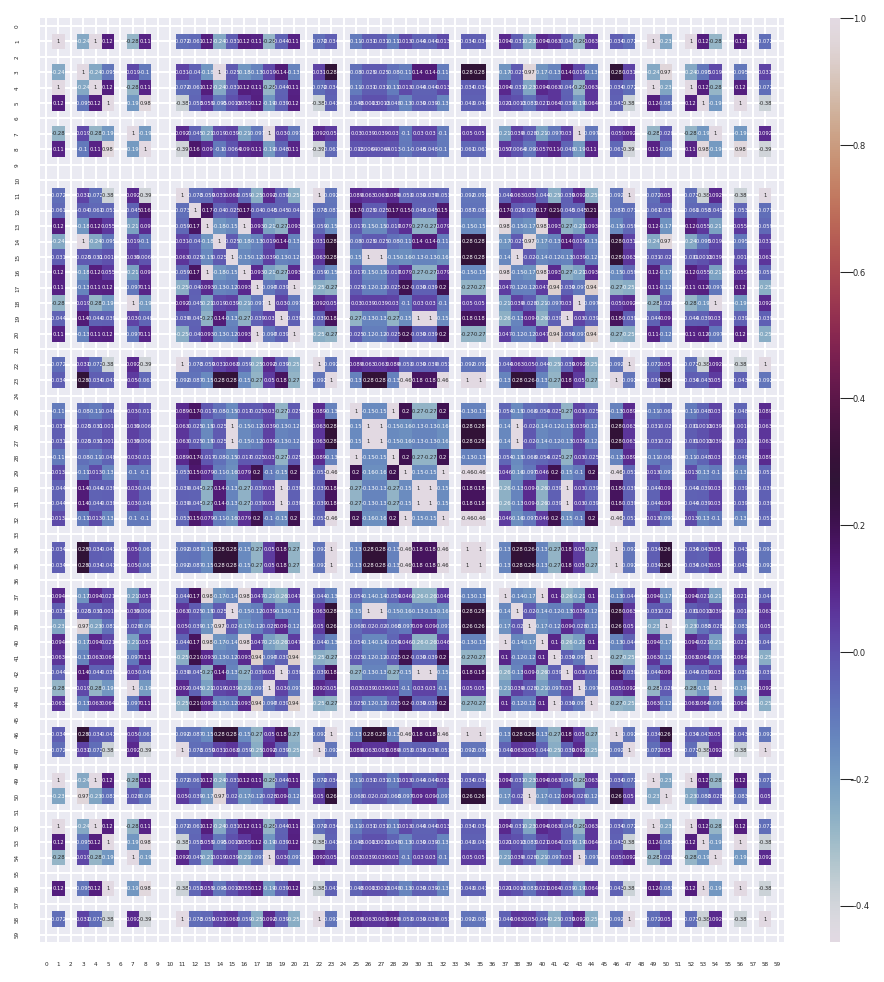

In [19]:
# Plot correlation matrix for observation
fig = plt.figure(figsize=(8, 8), dpi=150)
sns.set(font_scale=0.25)
#sns.heatmap(DF.corr(), cmap= 'twilight', cbar=True, annot=True, annot_kws={"size": 2.5}, cbar_kws={'shrink': 1.0, 'aspect': 100})

#----------------

ax = sns.heatmap(DF.corr(), cmap='twilight', cbar=True, annot=True, annot_kws={"size": 2.5},
                 cbar_kws={'shrink': 1.0, 'aspect': 100})

# Get the color bar from the heatmap
cbar = ax.collections[0].colorbar

# Change the linewidth of color bar ticks
for t in cbar.ax.get_yticklabels():
    t.set_horizontalalignment('center')
    t.set_fontsize(4)

# Adjust linewidths in the color bar
cbar.ax.yaxis.set_tick_params(width=0.5)  # Here '0.5' is the linewidth, you can change this value

plt.show()

## Formating Data into Node-Edges

In [16]:
EDGES = [] # To store edge(converted) data

In [17]:
def edges():
  # Converting the cell opening orientation data into inter-cell connectivity
  # To be continued ------------------------------------------------------------

SyntaxError: ignored

## Building Graph Networks

In [ ]:
!pip install pyvis
!pip install dimcli plotly networkx pyvis jsonpickle  -U --quiet

In [ ]:
from pyvis.network import Network

import dimcli
from dimcli.utils import *
from dimcli.utils.networkviz import NetworkViz # custom version of pyvis - colab-compatible

In [ ]:
# test with fake data
net = NetworkViz(notebook=True)

s = 10
net.add_nodes([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
              label=['c1_u', 'c1_d', 'c1_l', 'c1_r', 'c2_u', 'c2_d', 'c2_l', 'c2_r', 'c3_u', 'c3_d', 'c3_l', 'c3_r'],
              color=['blue', 'blue', 'blue', 'blue', 'green', 'green', 'green', 'green', 'orange', 'orange', 'orange', 'orange'],
              size=[s, s, s, s, s/2, s/2, s/2, s/2, s, s, s, s])
#net.show('list_of_nodes_with_color.html')

net.add_edges([(1, 3), (1, 4), (2, 3), (2, 4), (3, 1), (4, 9), (5, 1), (5, 2), (5, 9), (6, 2), (6, 4), (7, 2), (8, 6), (8, 4), (9, 2), (10, 8), (11, 2), (11, 7), (11, 8), (12, 2), (12, 5), (12, 6)])
net.show('edges.html')



In [ ]:
# test with my dataset
net = NetworkViz(notebook=True)

node_id = []

node_size = 10 #@param{type:'slider', min:0, max:32, step:1}
size = [node_size]*60 # size of all nodes (60 here)

for i in range(60):
  node_id.append(i+1) # From 1 to 60
print(node_id)

net.add_nodes(node_id, label=[*df], size=size)
#net.show('list_of_nodes_with_color.html')

net.add_edges([(1, 3), (1, 4), (2, 3), (2, 4), (3, 1), (4, 9), (5, 1), (5, 2), (5, 9), (6, 2), (6, 4), (7, 2), (8, 6), (8, 4), (9, 2), (10, 8), (11, 2), (11, 7), (11, 8), (12, 2), (12, 5), (12, 6)])
net.show('edges.html')

In [ ]:
"""
# Pipeline allowing features to be called in the format 'c(n)_direction'
def callFeature(cell_num, open_dir):
  featureString = "c{num}_{dir}".format(num = cell_num, dir = open_dir)
  return featureString

# Convert opening orirntystion data into room connectivity
def roomConnectivity():
  for n in range(15):
    # same room with the cell above
    if callFeature(n, u) == 1:

    else:

    # same room with the cell below
    if callFeature(n, d) == 1:

    else:

    # same room with the cell on the right
    if callFeature(n, l) == 1:

    else:

    # same room with the cell on the right
    if callFeature(n, r) == 1:

    else:

"""

## Graph2Plan Reasoning
Reference: https://vcc.tech/research/2020/Graph2Plan#:~:text=Our%20deep%20neural%20network%20Graph2Plan,)%2C%20like%20in%20previous%20works.


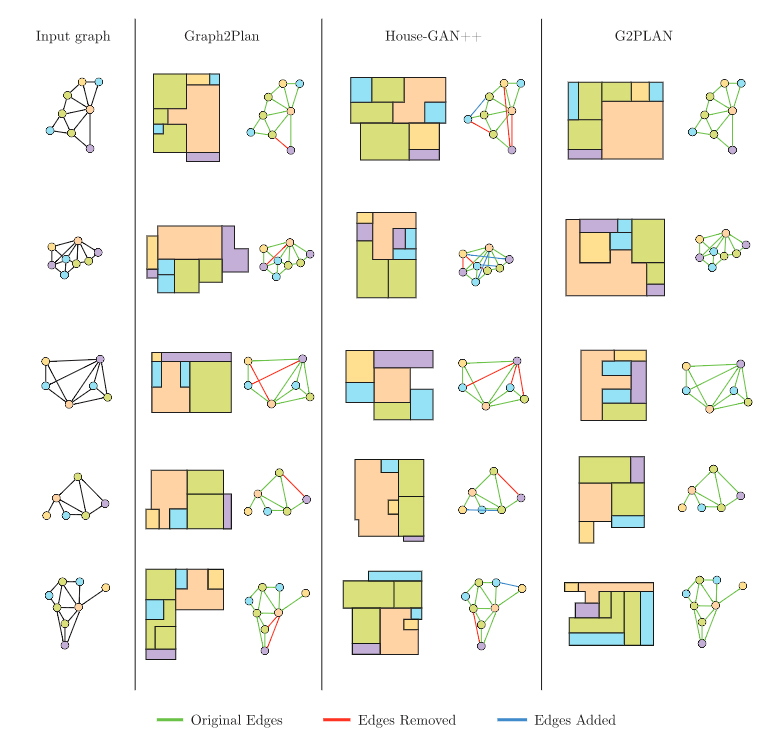

## Import Necessary Packages##

In [ ]:
import os
import json
import sys
import shutil
import random
import pickle
import datetime
import argparse
import pathlib as path
import scipy.io as sio
import numpy as np
import os

import tqdm
import logging

import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision
from tensorboardX import SummaryWriter

from model.utils import int_tuple, str_tuple, bool_flag
from model.metrics import iou,MetricAverage,image_acc,image_acc_ignore,binary_image_acc
from model.model import Model
from model.floorplan import FloorPlanDataset,floorplan_collate_fn
from model.loss import *
from model.box_utils import *
from model.utils import *

# Ignite is a high-level library to help with training and evaluating neural networks in PyTorch flexibly and transparently.
from ignite.contrib.handlers.tensorboard_logger import *
from ignite.contrib.handlers import *
from ignite.contrib.metrics import *
from ignite.metrics.accuracy import _BaseClassification
from ignite.engine import *
from ignite.handlers import *
from ignite.metrics import *

### Split Data

In [ ]:
data = sio.loadmat('data.mat',squeeze_me=True,struct_as_record=False)['data']
np.random.shuffle(data)

len_train,len_valid = int(len(data)*0.70), int(len(data)*0.15)
# deep_layout
# len_train,len_valid = 75000, 3000

data_train = data[:len_train]
data_valid = data[len_train:len_train+len_valid]
data_test = data[len_train+len_valid:]

data_dir = './data'
if not os.path.exists(data_dir):
    os.mkdir(data_dir)

sio.savemat(f'{data_dir}/data_train.mat',{'data':data_train})
sio.savemat(f'{data_dir}/data_valid.mat',{'data':data_valid})
sio.savemat(f'{data_dir}/data_test.mat',{'data':data_test})

### Training Model

In [ ]:
def parse_args():
    parser = argparse.ArgumentParser()

    ''' Dataset '''
    parser.add_argument('--dataset_dir', default='./data', type=str)
    parser.add_argument('--image_size', default='128,128', type=int_tuple)
    parser.add_argument('--input_dim', default=3, type=int)
    parser.add_argument('--with_house', default='0', type=bool_flag)
    parser.add_argument('--pos_dim', default=25, type=int)
    parser.add_argument('--area_dim', default=10, type=int)

    ''' Dataloader '''
    parser.add_argument('--batch_size', default=20, type=int)
    parser.add_argument('--workers', default=8, type=int)
    parser.add_argument('--train_shuffle', default='1', type=bool_flag)

    ''' Model '''
    # architecture
    parser.add_argument('--gene_layout', default='1', type=bool_flag)
    parser.add_argument('--box_refine', default='1', type=bool_flag)
    # input
    parser.add_argument('--embedding_dim', default=128,type=int)
    # refine
    parser.add_argument('--refinement_dims', default='1024, 512, 256, 128, 64',type=int_tuple)
    # box refine
    parser.add_argument('--box_refine_arch', default='I15,C3-64-2,C3-128-2,C3-256-2',type=str)
    parser.add_argument('--roi_cat_feature',default='1',type=bool_flag)
    # control
    parser.add_argument('--gt_box', default=0, type=bool_flag)
    parser.add_argument('--relative', default=1, type=bool_flag)

    ''' Loss '''
    parser.add_argument('--mutex', default=1, type=bool_flag)
    parser.add_argument('--inside', default=1, type=bool_flag)
    parser.add_argument('--coverage', default=1, type=bool_flag)
    parser.add_argument('--render', default=1, type=bool_flag)
    parser.add_argument('--nsample', default=100,type=int)
    parser.add_argument('--loss_refine', default=0, type=bool_flag)
    parser.add_argument('--render_refine', default=0, type=bool_flag)

    ''' Optimizer '''
    parser.add_argument('--optimizer',default='Adam',type=str)
    parser.add_argument('--scheduler',default='plateau',type=str)
    parser.add_argument('--learning_rate', default=1e-4, type=float)
    parser.add_argument('--decay_rate', default=1e-4, type=float)
    parser.add_argument('--step_size', default=10, type=float)
    parser.add_argument('--step_rate', default=0.5, type=float)

    ''' Checkpoints '''
    parser.add_argument('--save_interval', default=5, type=int)
    parser.add_argument('--n_saved', default=20, type=int)
    parser.add_argument('--pretrain', default=None, type=str)
    parser.add_argument('--skip_train', default=0, type=bool_flag)

    ''' Trainer '''
    parser.add_argument('--seed', default=74269,type=int)
    parser.add_argument('--epoch', default=101,type=int)
    parser.add_argument('--start_epoch',default=None,type=int)

    ''' Others '''
    parser.add_argument('--gpu', default='0', type=str)
    parser.add_argument('--multi_gpu', default=None, type=str)
    parser.add_argument('--suffix',default=None,type=str)
    parser.add_argument('--debug', default=0, type=bool_flag)
    parser.add_argument('--test', default=0, type=bool_flag)

    return parser.parse_args()

def check_manual_seed(args):
    seed = args.seed or random.randint(1, 10000)
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

def get_model(args):
    return Model(embedding_dim=args.embedding_dim,
    image_size=args.image_size,
    input_dim = args.input_dim,
    attribute_dim=args.pos_dim+args.area_dim,
    refinement_dims=args.refinement_dims if args.gene_layout else None,
    box_refine_arch=args.box_refine_arch if args.box_refine else None,
    roi_cat_feature=args.roi_cat_feature)

def get_dataset(args,split='valid'):
    return FloorPlanDataset(f'{args.dataset_dir}/data_{split}.mat')

def get_dataloader(args,dataset,split):
    print(f"{split},shuffle:",split=='train' and args.train_shuffle and (not args.debug))
    return DataLoader(
        dataset,
        batch_size=args.batch_size,
        shuffle=True if split=='train' and args.train_shuffle and (not args.debug) else False,
        num_workers=args.workers,
        drop_last=True if split=='train' else False,
        collate_fn=floorplan_collate_fn
        )

def  get_data_loaders(args):
    train_dataset = get_dataset(args,'train' if not args.debug else 'valid') if not args.skip_train else None
    valid_dataset = get_dataset(args,'valid')
    test_dataset = get_dataset(args,'test')

    train_loader = get_dataloader(args,train_dataset,'train') if not args.skip_train else None
    valid_loader = get_dataloader(args,valid_dataset,'valid')
    test_loader = get_dataloader(args,test_dataset,'test')
    return train_loader,valid_loader,test_loader

def get_optimizer(model,args):
    if args.optimizer == 'SGD':
        optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0)
    elif args.optimizer == 'Adam':
        optimizer = torch.optim.Adam(
            model.parameters(),
            lr=args.learning_rate,
            betas=(0.9, 0.999),
            eps=1e-08,
            weight_decay=args.decay_rate
        )
    elif args.optimizer == 'AdamW':
        optimizer = torch.optim.AdamW(
            model.parameters(),
            lr = args.learning_rate,
            weight_decay=args.decay_rate
        )
    return optimizer

def get_scheduler(optimizer,args):
    if args.scheduler == 'step':
        scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=args.step_size, gamma=args.step_rate)
    else:
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,mode='max',factor=args.step_rate,patience=args.step_size,threshold=0.005,verbose=True)
    return scheduler

def get_losses(args):
    loss = {}
    weight = torch.ones(15).cuda()
    weight[13]=weight[14]=0 # ignore unused category
    if args.gene_layout:
        loss['gene_ce'] = torch.nn.CrossEntropyLoss(weight=weight)
    loss['box_mse'] = torch.nn.SmoothL1Loss()
    if args.box_refine:
        loss['box_ref_mse'] = torch.nn.SmoothL1Loss()
    if args.mutex:
        loss['mutex'] = MutexLoss(nsample=args.nsample)
    if args.inside:
        loss['inside'] = InsideLoss(nsample=args.nsample)
    if args.coverage:
        loss['coverage'] = CoverageLoss(nsample=args.nsample)
    if args.render:
        loss['render'] = BoxRenderLoss(nsample=args.nsample)
    return loss

def batch_cuda(batch):
    batch = list(batch)
    for i in range(len(batch)):
        if isinstance(batch[i],torch.Tensor):
            batch[i] = batch[i].cuda()
        elif isinstance(batch[i],list) and isinstance(batch[i][0],torch.Tensor):
            batch[i] = [e.cuda() for e in batch[i]]
    return batch

def main(args):
    args.epoch=args.epoch if not args.debug else 6
    print("Create dir...")
    start_date = str(datetime.datetime.now().strftime('%Y-%m-%d'))+("" if not args.debug else "_debug")+("" if not args.test else "_test")
    if not os.path.exists(f'../experiment'):
        os.mkdir(f'../experiment')
    experiment_dir = path.Path(f'../experiment/{start_date}')
    experiment_dir.mkdir(exist_ok=True)
    start_time = str(datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')) + '' if args.suffix is None else args.suffix
    file_dir = path.Path(f'{experiment_dir}/DeepLayout_{start_time}')
    file_dir.mkdir(exist_ok=True)
    checkpoints_dir = file_dir.joinpath('checkpoints/')
    checkpoints_dir.mkdir(exist_ok=True)
    log_dir = file_dir.joinpath('logs/')
    log_dir.mkdir(exist_ok=True)
    shutil.copy(__file__,log_dir/'train.py')
    shutil.copytree('./model',log_dir/'model')
    output_dir = file_dir.joinpath('output/')
    output_dir.mkdir(exist_ok=True)
    logger = logging.getLogger()
    logger.setLevel(logging.INFO)
    formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
    file_handler = logging.FileHandler(str(log_dir)+'/log.txt')
    file_handler.setLevel(logging.INFO)
    file_handler.setFormatter(formatter)
    logger.addHandler(file_handler)
    if args.skip_train:
        logger.info(f'python {args.argv}')
    else:
        logger.info(f'python {args.argv} --skip_train 1 --pretrain ')
    logger.info(args)
    logger.info('---------------------------------------------------TRANING---------------------------------------------------')
    logger.info(f'Use seed: {args.seed}')
    # check_manual_seed(args)

    os.environ["CUDA_VISIBLE_DEVICES"] = args.gpu if args.multi_gpu is None else args.multi_gpu

    print("Create dataloader...")
    train_loader,valid_loader,test_loader = get_data_loaders(args)
    print("Create model...")
    model = get_model(args)
    print("Gene:",model.refinement_net!=None and args.gene_layout)
    print("Refine:",args.box_refine)
    print("Cat feat:",args.roi_cat_feature)
    print("GT BOX:",args.gt_box)
    print("Iniside Loss:",args.inside)
    print("Coverage Loss:",args.coverage)
    print("Mutex Loss:",args.mutex)
    print("Render Loss:",args.render)
    logger.info(argparse.Namespace(embedding_dim=args.embedding_dim,
    image_size=args.image_size,
    input_dim = args.input_dim,
    attribute_dim=args.pos_dim+args.area_dim,
    refinement_dims=args.refinement_dims if args.gene_layout else None,
    box_refine_arch=args.box_refine_arch if args.box_refine else None,
    roi_cat_feature=args.roi_cat_feature))
    logger.info(str(model))
    optimizer = get_optimizer(model,args)
    scheduler = get_scheduler(optimizer,args)
    loss = get_losses(args)

    if args.pretrain is not None:
        model.load_state_dict(torch.load(args.pretrain))

    print("Cuda...")
    model.cuda()

    def update(engine,batch):
        model.train()
        optimizer.zero_grad()

        boundary,inside_box,objs,attrs,triples,layout,boxes,inside_coords,obj_to_img,triple_to_img,name = batch_cuda(batch)

        if args.relative: boxes = box_rel2abs(boxes,inside_box,obj_to_img)

        model_out = model(
            objs,
            triples,
            boundary,
            obj_to_img = obj_to_img,
            attributes=attrs,
            boxes_gt= boxes if args.gt_box else None,
            generate = args.gene_layout and engine.state.epoch>1,
            refine = args.box_refine and engine.state.epoch>2,
            relative = args.relative,
            inside_box=inside_box if args.relative else None,
        )
        boxes_pred, gene_layout, boxes_refine = model_out

        total_loss = 0
        loss_items = {}
        epoch = engine.state.epoch
        step_weight = [0.1,0.5,1.0]
        for name in loss:
            l = None
            if name=='box_mse':
                l = loss[name](boxes_pred,boxes)
            else:
                if epoch>1:
                    if name=='gene_ce':
                        l = step_weight[epoch-2 if epoch<=3 else -1]*loss[name](gene_layout,layout)
                    elif name=='mutex':
                        l = 0.1*loss[name](boxes_pred,obj_to_img,objs)
                        if args.box_refine and args.loss_refine and epoch>2: l+=loss[name](boxes_refine,obj_to_img,objs)
                    elif name=='inside':
                        l = 0.1*loss[name](boxes_pred,inside_box,obj_to_img)
                        if args.box_refine and args.loss_refine and epoch>2: l+=loss[name](boxes_refine,inside_box,obj_to_img)
                    elif name=='coverage':
                        l = 0.1*loss[name](boxes_pred,inside_coords,obj_to_img)
                        if args.box_refine and args.loss_refine and epoch>2: l+=loss[name](boxes_refine,inside_coords,obj_to_img)
                    elif name=='render':
                        l = loss[name](boxes_pred,boxes)
                        if args.box_refine and args.loss_refine and epoch>2: l+=loss[name](boxes_refine,boxes)

                if epoch>2:
                    if name=='box_ref_mse':
                        l = step_weight[epoch-3 if epoch<=4 else -1]*loss[name](boxes_refine,boxes)

            if l is not None:
                total_loss+=l
                loss_items[name]=l.item()
        loss_items['total_loss'] = total_loss.item()

        total_loss.backward()
        optimizer.step()
        return loss_items

    def inference(engine,batch):
        model.eval()
        with torch.no_grad():
            boundary,inside_box,objs,attrs,triples,layout,boxes,inside_coords,obj_to_img,triple_to_img,name = batch_cuda(batch)

            if args.relative: boxes = box_rel2abs(boxes,inside_box,obj_to_img)

            model_out = model(
                objs,
                triples,
                boundary,
                obj_to_img = obj_to_img,
                attributes=attrs,
                boxes_gt= boxes if args.gt_box else None,
                generate = args.gene_layout,
                refine = args.box_refine,
                relative = args.relative,
                inside_box=inside_box if args.relative else None,
            )
            boxes_pred, gene_layout, boxes_refine = model_out

            total_loss = 0
            loss_items = {}
            for name in loss:
                l = None
                if name=='box_mse':
                    l = loss[name](boxes_pred,boxes)
                if engine.state.epoch>1:
                    if name=='gene_ce':
                        l = loss[name](gene_layout,layout)
                    elif name=='mutex':
                        l = 0.1*loss[name](boxes_pred,obj_to_img,objs)
                        if args.box_refine and args.loss_refine: l+=0.1*loss[name](boxes_refine,obj_to_img,objs)
                    elif name=='inside':
                        l = 0.1*loss[name](boxes_pred,inside_box,obj_to_img)
                        if args.box_refine and args.loss_refine: l+=0.1*loss[name](boxes_refine,inside_box,obj_to_img)
                    elif name=='coverage':
                        l = 0.1*loss[name](boxes_pred,inside_coords,obj_to_img)
                        if args.box_refine and args.loss_refine: l+=0.1*loss[name](boxes_refine,inside_coords,obj_to_img)
                    elif name=='render':
                        l = loss[name](boxes_pred,boxes)
                        if args.box_refine and args.loss_refine: l+=loss[name](boxes_refine,boxes)

                if engine.state.epoch>2:
                    if name=='box_ref_mse':
                        l = loss[name](boxes_refine,boxes)

                if l is not None:
                    total_loss+=l
                    loss_items[name]=l.item()
            loss_items['total_loss'] = total_loss.item()

            # boxes pred
            boxes_pred = boxes_pred.detach()
            boxes_pred = centers_to_extents(boxes_pred)

            if args.gene_layout:
                gene_layout = gene_layout*boundary[:,:1]

            # boxes refine
            if args.box_refine:
                boxes_refine = boxes_refine.detach()
                boxes_refine = centers_to_extents(boxes_refine)

            # gt
            boxes = centers_to_extents(boxes)

            return {
                'loss':loss_items,
                'pred':[
                    boxes_pred,
                    gene_layout.detach() if args.gene_layout else None,
                    boxes_refine if args.box_refine else None,
                    ],
                'gt':[layout,boxes]
            }

    print("Create trainer...")
    optimizer.step()
    scheduler.step(0)
    trainer = Engine(update)
    valid_evaluator = Engine(inference)

    if args.start_epoch is not None:
        @trainer.on(Events.STARTED)
        def set_up_state(engine):
            engine.state.epoch = args.start_epoch

    total_func = lambda e:(e.state.metrics['box_iou']+(e.state.metrics['gene_acc'] if args.gene_layout else 0)+(e.state.metrics['box_refine_iou'] if args.box_refine else 0))

    @valid_evaluator.on(Events.COMPLETED)
    def schedual(engine):
        optimizer.step()
        if args.scheduler == 'step':
            scheduler.step()
        else:
            scheduler.step(total_func(engine))

    @trainer.on(Events.EPOCH_COMPLETED)
    def evaluate(engine):
        valid_evaluator.run(valid_loader)

    # Metrics
    MetricAverage(output_transform=lambda output:iou(output['pred'][0],output['gt'][1])).attach(valid_evaluator,'box_iou')
    if args.gene_layout:
        MetricAverage(output_transform=lambda output:image_acc_ignore(output['pred'][1],output['gt'][0],13)).attach(valid_evaluator,'gene_acc')
    if args.box_refine:
        MetricAverage(output_transform=lambda output:iou(output['pred'][2],output['gt'][1])).attach(valid_evaluator,'box_refine_iou')

    metrics = ['img_acc','box_iou','mask_acc']

    # TQDM
    ProgressBar(persist=True).attach(trainer, output_transform=lambda o:{'loss':o['total_loss']}, metric_names='all')
    ProgressBar(persist=False).attach(valid_evaluator, output_transform=lambda o:{'loss':o['loss']['total_loss']},metric_names='all')

    # Tensorboard
    tb_logger = TensorboardLogger(log_dir=log_dir)
    tb_logger.attach(trainer,
                 log_handler=OutputHandler(tag="train",output_transform=lambda o: o,metric_names='all'),
                 event_name=Events.ITERATION_COMPLETED)
    tb_logger.attach(trainer,
                 log_handler=OptimizerParamsHandler(optimizer),
                 event_name=Events.ITERATION_STARTED)
    tb_logger.attach(valid_evaluator,
                 log_handler=OutputHandler(tag="valid",output_transform=lambda o:o['loss'],metric_names='all', global_step_transform=global_step_from_engine(trainer)),
                 event_name=Events.EPOCH_COMPLETED)

    # Logging
    @trainer.on(Events.EPOCH_COMPLETED)
    def log_results(engine):
        logging.info(f'Train, Epoch{engine.state.epoch}, Loss: {str(engine.state.output)}')

    @valid_evaluator.on(Events.EPOCH_COMPLETED)
    def log_results(engine):
        loss = engine.state.output['loss']
        metrics = engine.state.metrics
        logging.info(f'Valid, Epoch{engine.state.epoch}, Loss: {str(loss)}')
        logging.info(f'Valid, Epoch{engine.state.epoch}, Metrics: {str(metrics)}')

    # Checkpoint
    epoch_saver = ModelCheckpoint(checkpoints_dir, 'epoch',save_interval=args.save_interval,n_saved=args.n_saved, require_empty=False, create_dir=True)
    latest_saver = ModelCheckpoint(checkpoints_dir, 'latest',score_function=lambda e:e.state.epoch,n_saved=1, require_empty=False, create_dir=True)
    loss_saver = ModelCheckpoint(checkpoints_dir, 'loss',score_function=lambda e:-e.state.output['loss']['total_loss'],n_saved=1, require_empty=False, create_dir=True)

    trainer.add_event_handler(Events.EPOCH_COMPLETED, latest_saver, {'model': model,'opt':optimizer})
    trainer.add_event_handler(Events.EPOCH_COMPLETED, epoch_saver, {'model': model,'opt':optimizer})
    valid_evaluator.add_event_handler(Events.COMPLETED, loss_saver, {'model': model})

    if not args.skip_train:
        trainer.run(train_loader,max_epochs=args.epoch)
    tb_logger.close()

    output = {}
    def test(engine,batch):
        model.eval()
        with torch.no_grad():
            boundary,inside_box,objs,attrs,triples,layout,boxes,inside_coords,obj_to_img,triple_to_img,name = batch_cuda(batch)

            model_out = model(
                objs,
                triples,
                boundary,
                obj_to_img = obj_to_img,
                attributes=attrs,
                boxes_gt= boxes if args.gt_box else None,
                generate = args.gene_layout,
                refine = args.box_refine,
                relative = args.relative,
                inside_box=inside_box if args.relative else None,
            )
            boxes_pred, gene_layout, boxes_refine = model_out

            ''' box: x_c,y_c,w,h -> x0,y0,x1,y1 '''
            # boxes pred
            boxes_pred = boxes_pred.detach()
            boxes_pred = centers_to_extents(boxes_pred)

            # boxes refine
            if args.box_refine:
                boxes_refine = boxes_refine.detach()
                boxes_refine = centers_to_extents(boxes_refine)

            # gt
            if args.relative: boxes = box_rel2abs(boxes,inside_box,obj_to_img)
            boxes = centers_to_extents(boxes)

            ''' layout: B*C*H*W->B*H*W '''
            if args.gene_layout:
                gene_layout = gene_layout*boundary[:,:1]
                gene_preds = torch.argmax(gene_layout.softmax(1).detach(),dim=1)

            ''' layout with outside'''
            for i in range(len(layout)):
                mask = boundary[i,0]==0
                if args.gene_layout:
                    gene_preds[i][mask]=13

            ''' mertics '''
            # box iou
            box_ious = iou(boxes_pred,boxes)
            box_refine_ious = None
            if args.box_refine:
                box_refine_ious = iou(boxes_refine,boxes)

            gene_acc_all = None
            gene_acc_fg = None
            if args.gene_layout:
                gene_acc_all = image_acc(gene_preds,layout)
                gene_acc_fg = image_acc_ignore(gene_preds,layout,13)

            ''' save output '''
            for i in range(len(layout)):
                ''' objs '''
                obj = objs[obj_to_img==i].cpu().numpy()

                ''' box '''
                box_pred = boxes_pred[obj_to_img==i]
                box_pred = box_pred.cpu().numpy()
                box_iou = box_ious[obj_to_img==i].view(-1).cpu().numpy()

                box_refine = None
                if args.box_refine:
                    box_refine = boxes_refine[obj_to_img==i].cpu().numpy()
                    box_refine_iou = box_refine_ious[obj_to_img==i].view(-1).cpu().numpy()

                ''' layout '''
                if args.gene_layout:
                    gene_pred = gene_preds[i].cpu().numpy().astype('uint8')


                output[name[i]] = {
                        'obj':obj,
                        'box_gt':boxes[obj_to_img==i].cpu().numpy(),

                        'box_pred':box_pred,
                        'box_iou':box_iou,

                        'box_refine':box_refine if args.box_refine else None,
                        'box_refine_iou':box_refine_iou if args.box_refine else None,

                        'gene_pred':gene_pred if args.gene_layout else None,
                        'gene_acc_all': gene_acc_all[i].item() if args.gene_layout else None,
                        'gene_acc_fg':gene_acc_fg[i].item() if args.gene_layout else None
                        }
            return {
                'pred':[
                    boxes_pred,#0
                    gene_preds if args.gene_layout else None,#1
                    boxes_refine if args.box_refine else None,#2
                    ],
                'gt':[layout,boxes]
            }

    test_evaluator = Engine(test)

    MetricAverage(output_transform=lambda output:iou(output['pred'][0],output['gt'][1])).attach(test_evaluator,'box_iou')

    if args.gene_layout:
        MetricAverage(output_transform=lambda output:image_acc_ignore(output['pred'][1],output['gt'][0],13)).attach(test_evaluator,'gene_acc')
        MetricAverage(output_transform=lambda output:image_acc(output['pred'][1],output['gt'][0])).attach(test_evaluator,'gene_acc_all')
    if args.box_refine:
        MetricAverage(output_transform=lambda output:iou(output['pred'][2],output['gt'][1])).attach(test_evaluator,'box_refine_iou')

    ProgressBar(persist=False).attach(test_evaluator)
    @test_evaluator.on(Events.COMPLETED)
    def save_metrics(engine):
        metrics = engine.state.metrics
        with open(f'{output_dir}/output_{start_time}_metrics.json','w') as f:
            f.write(str(metrics))

    if not args.skip_train:
        test_evaluator.run(valid_loader)
    else:
        test_evaluator.run(test_loader)
    with open(f'{output_dir}/output_{start_time}.pkl','wb') as f:
        pickle.dump(output,f,pickle.HIGHEST_PROTOCOL)

if __name__ == "__main__":
    args = parse_args()
    args.argv = ' '.join(sys.argv)
    main(args)